# **Initial Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

## **Kaggle api to access datasets**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravmalik26/food-delivery-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Agnik\.cache\kagglehub\datasets\gauravmalik26\food-delivery-dataset\versions\1


In [3]:
import os

# List all files in the dataset directory
print(os.listdir(path))

# Load the CSV files
train = pd.read_csv(os.path.join(path, 'train.csv'))

['Sample_Submission.csv', 'test.csv', 'train.csv']


# **Data Preparation**

In [4]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [5]:
train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

### **Handling Missing Values**

In [6]:
train.isna().any().sum() #no null values present

0

In [7]:
train['Delivery_person_Age'].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 'NaN ', '28', '39', '30', '15',
       '50'], dtype=object)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [9]:
train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [10]:
train['Delivery_person_Ratings'] = pd.to_numeric(train['Delivery_person_Ratings'], errors='coerce')
train['multiple_deliveries'] = pd.to_numeric(train['multiple_deliveries'], errors='coerce')
train['Delivery_person_Age'] = pd.to_numeric(train['Delivery_person_Age'], errors='coerce') # Added line

train['Order_Date'] = pd.to_datetime(train['Order_Date'], errors='coerce', dayfirst=True)
train['Time_Orderd'] = pd.to_datetime(train['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.time
train['Time_Order_picked'] = pd.to_datetime(train['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.time

train['Weatherconditions'] = train['Weatherconditions'].str.replace('conditions ', '', regex=False)
train['City'] = train['City'].str.strip()

# Clean 'Time_taken(min)' column
train['Time_taken(min)'] = train['Time_taken(min)'].str.extract(r'(\d+)').astype(float) # Changed df to train

### **Handling Outliers**

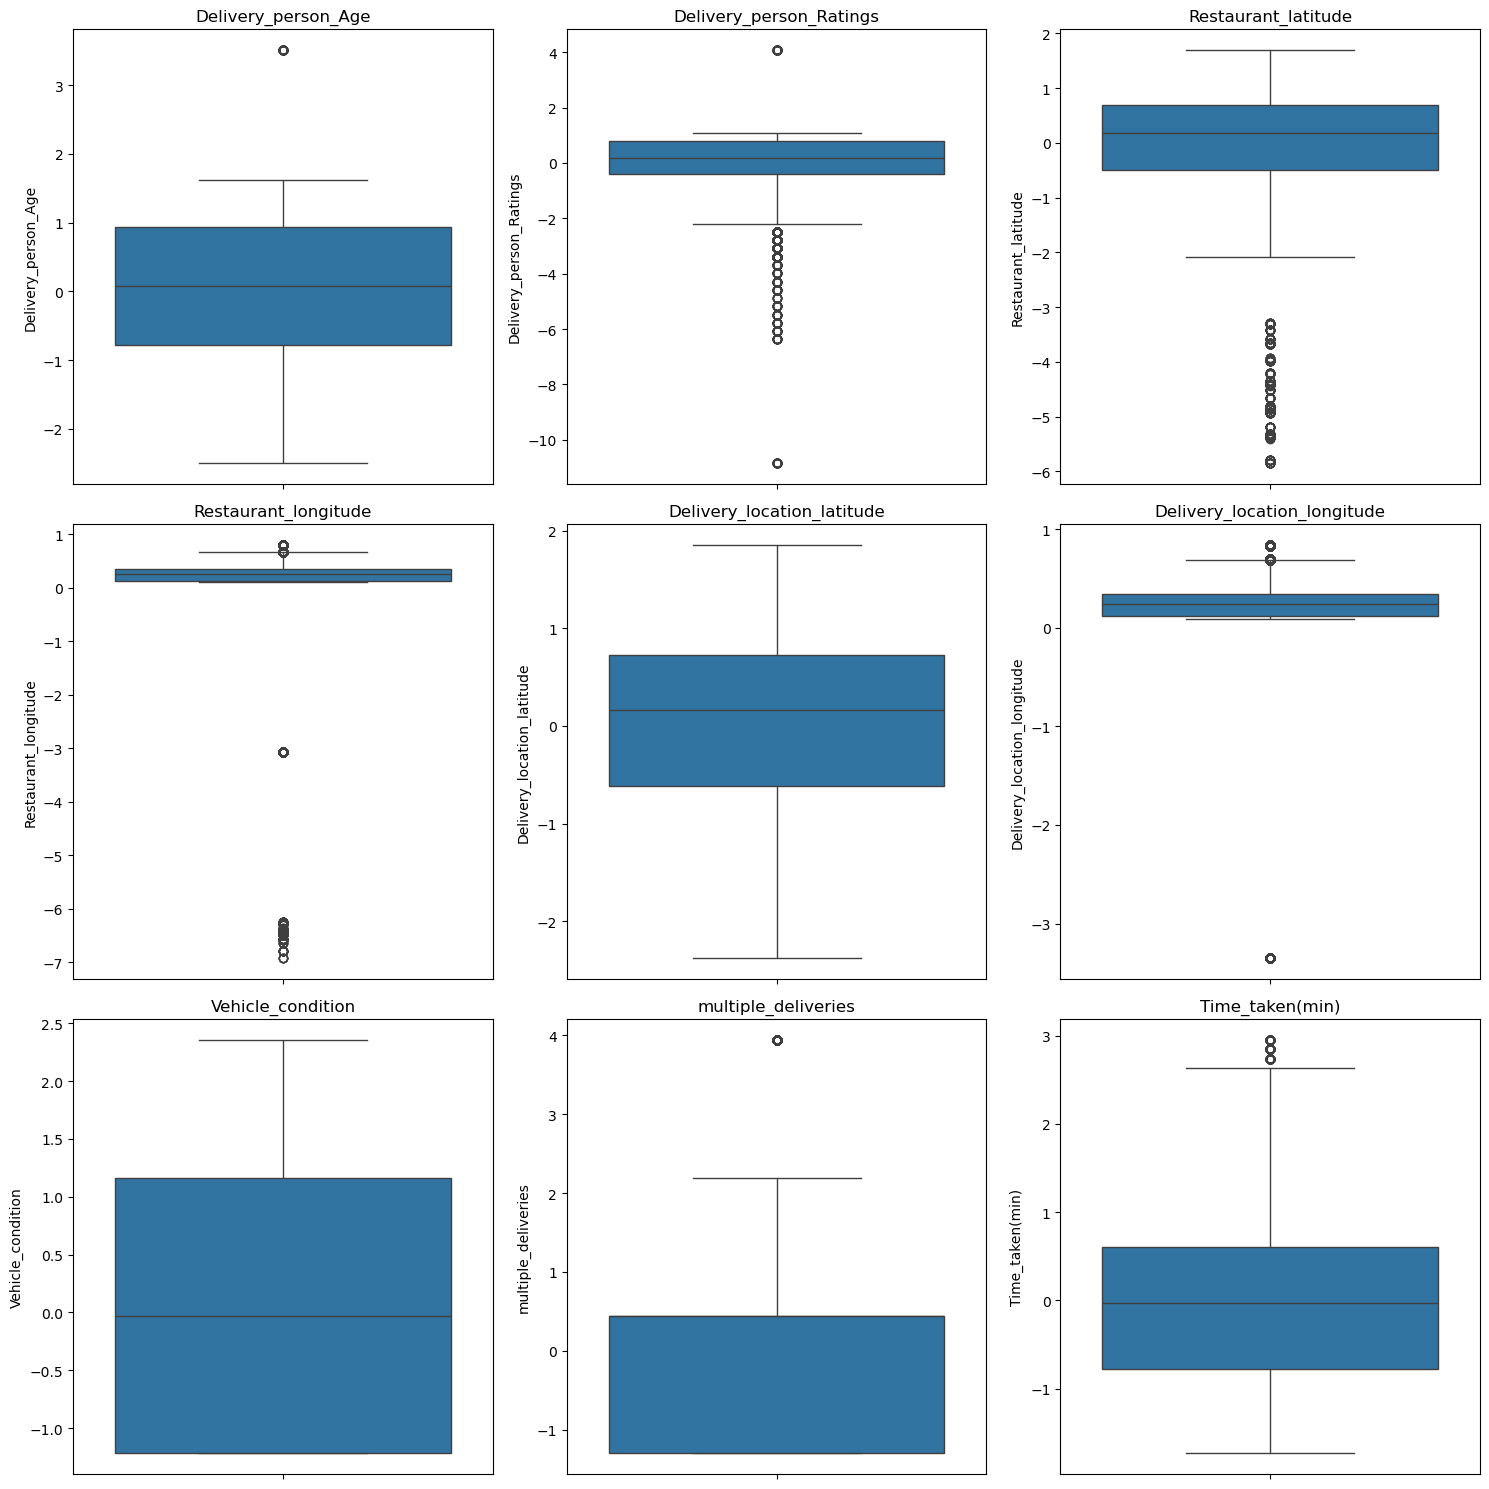

In [11]:
numerical_cols = train.select_dtypes(include=np.number).columns

n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot((train[col] - train[col].mean()) / train[col].std())
    plt.title(col)

plt.tight_layout()
plt.show()

In [12]:
train.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

Number of outliers in Delivery_person_Age: 0


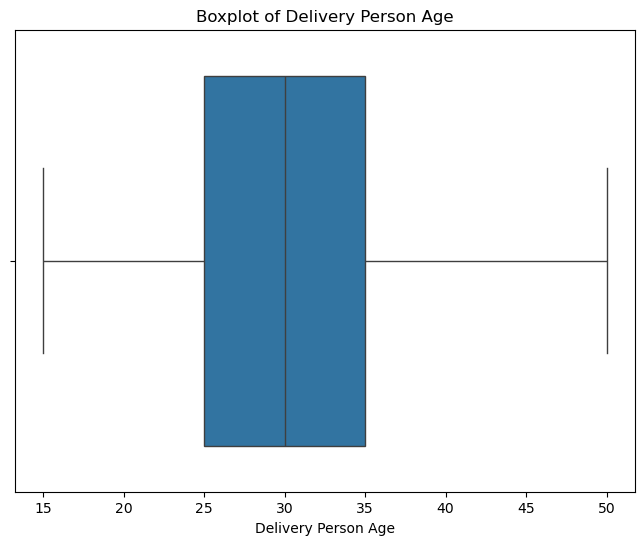

In [13]:
# Convert 'Delivery_person_Age' to numeric, coercing errors
train['Delivery_person_Age'] = pd.to_numeric(train['Delivery_person_Age'], errors='coerce')

# Drop rows where 'Delivery_person_Age' is NaN after coercion
train.dropna(subset=['Delivery_person_Age'], inplace=True)

# Calculate IQR for 'Delivery_person_Age'
Q1 = train['Delivery_person_Age'].quantile(0.25)
Q3 = train['Delivery_person_Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[(train['Delivery_person_Age'] < lower_bound) | (train['Delivery_person_Age'] > upper_bound)]

print(f"Number of outliers in Delivery_person_Age: {len(outliers)}")

# Visualize the distribution of 'Delivery_person_Age' with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['Delivery_person_Age'])
plt.title('Boxplot of Delivery Person Age')
plt.xlabel('Delivery Person Age')
plt.show()

# to remove outliers:
train_cleaned = train[(train['Delivery_person_Age'] >= lower_bound) & (train['Delivery_person_Age'] <= upper_bound)]

# **Dropping Unwanted Columns**

In [14]:
train.drop(['ID'],axis=1,inplace=True)
train.drop(['Delivery_person_ID'],axis=1,inplace=True)
train.drop(['Order_Date'],axis=1,inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43739 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  float64
 1   Delivery_person_Ratings      43685 non-null  float64
 2   Restaurant_latitude          43739 non-null  float64
 3   Restaurant_longitude         43739 non-null  float64
 4   Delivery_location_latitude   43739 non-null  float64
 5   Delivery_location_longitude  43739 non-null  float64
 6   Time_Orderd                  43648 non-null  object 
 7   Time_Order_picked            43739 non-null  object 
 8   Weatherconditions            43739 non-null  object 
 9   Road_traffic_density         43739 non-null  object 
 10  Vehicle_condition            43739 non-null  int64  
 11  Type_of_order                43739 non-null  object 
 12  Type_of_vehicle              43739 non-null  object 
 13  multiple_deliveries  

In [16]:
train.shape

(43739, 17)

In [17]:
train.isna().sum()

Delivery_person_Age              0
Delivery_person_Ratings         54
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Time_Orderd                     91
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            934
Festival                         0
City                             0
Time_taken(min)                  0
dtype: int64

In [18]:
train['Delivery_person_Ratings'].fillna(train['Delivery_person_Ratings'].mean(), inplace=True)
train['multiple_deliveries'].fillna(train['multiple_deliveries'].mode()[0], inplace=True)
train['Time_Orderd'].fillna(train['Time_Orderd'].mode()[0], inplace=True)


train['City'].replace(['NaN', 'nan', '', ' '], np.nan, inplace=True)
train['Weatherconditions'].replace(['NaN', 'nan', '', ' '], np.nan, inplace=True)


train['City'].fillna(train['City'].mode()[0],inplace=True)
train['Weatherconditions'].fillna(train['City'].mode()[0], inplace=True)

In [19]:
train.isna().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [20]:
fake_nans = ["nan", "NaN","NaN " "NULL", "None", "", " "]
total_missing = train.isna().sum() + (train.isin(fake_nans)).sum()
print(total_missing)



Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64


In [21]:
train.shape

(43739, 17)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43739 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43739 non-null  float64
 1   Delivery_person_Ratings      43739 non-null  float64
 2   Restaurant_latitude          43739 non-null  float64
 3   Restaurant_longitude         43739 non-null  float64
 4   Delivery_location_latitude   43739 non-null  float64
 5   Delivery_location_longitude  43739 non-null  float64
 6   Time_Orderd                  43739 non-null  object 
 7   Time_Order_picked            43739 non-null  object 
 8   Weatherconditions            43739 non-null  object 
 9   Road_traffic_density         43739 non-null  object 
 10  Vehicle_condition            43739 non-null  int64  
 11  Type_of_order                43739 non-null  object 
 12  Type_of_vehicle              43739 non-null  object 
 13  multiple_deliveries  

In [23]:
train.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken(min)
count,43739.000000,43739.00000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.63378,17.210960,70.661177,17.459031,70.821842,1.004733,0.748988,26.287387
std,5.815155,0.33451,7.764225,21.475005,7.342950,21.153148,0.820928,0.567763,9.368339
min,15.000000,1.00000,-30.902872,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.50000,12.933298,73.170283,12.985996,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.70000,18.551440,75.898497,18.633626,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.90000,22.732225,78.045359,22.785049,78.104095,2.000000,1.000000,32.000000
max,50.000000,6.00000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


**Exploratory Data Analysis**

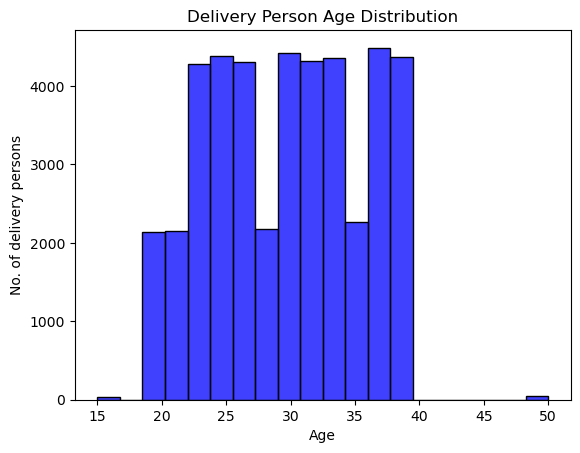

In [24]:
sns.histplot(train.Delivery_person_Age, bins=20, kde=False,color='Blue')
plt.title("Delivery Person Age Distribution")
plt.xlabel("Age")
plt.ylabel("No. of delivery persons")
plt.show()

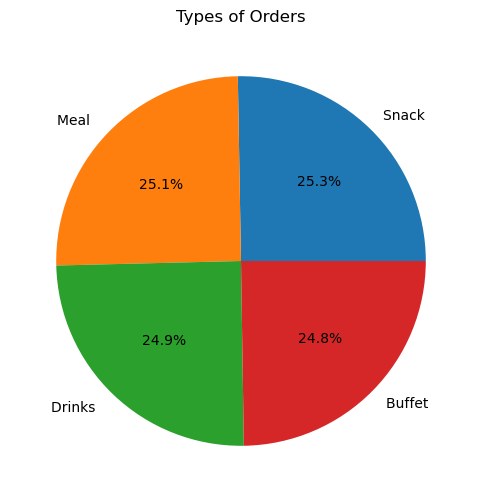

In [25]:
frequency =train['Type_of_order'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title("Types of Orders")
plt.show()

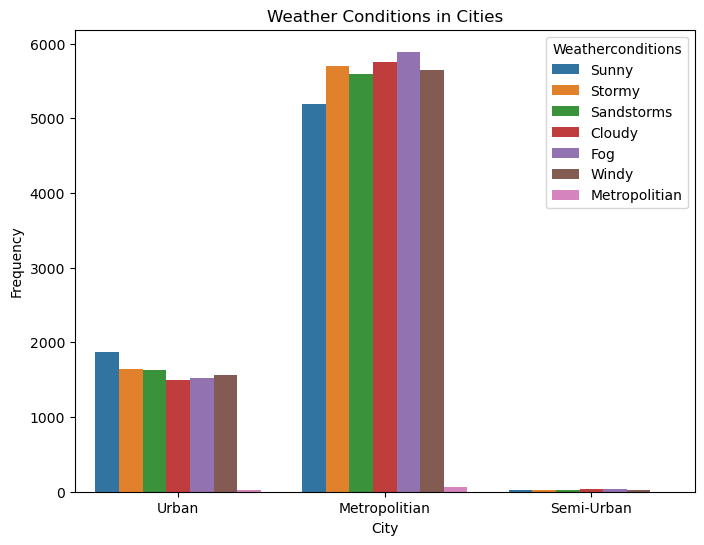

In [26]:
freq = train['City'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='City', hue='Weatherconditions')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Weather Conditions in Cities')
plt.legend(title='Weatherconditions')
plt.show()

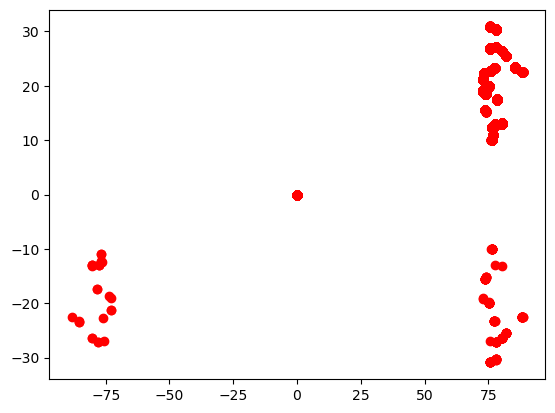

In [27]:
plt.scatter(x=train['Restaurant_longitude'], y=train['Restaurant_latitude'], color='red')
plt.show()

<Axes: >

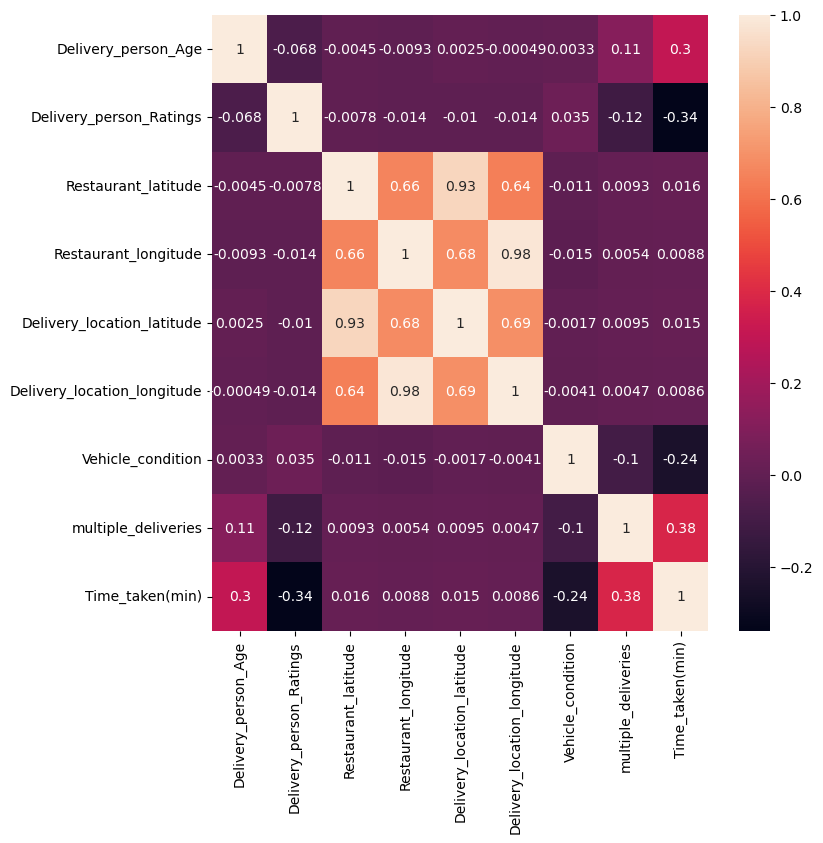

In [28]:
numeric_cols = train.select_dtypes(include=np.number)
plt.figure(figsize=(8,8))
sns.heatmap(numeric_cols.corr(), annot=True)


# **Feature Engineering**

In [29]:
#Column Transformation
import math
#Defining the Haversine formula function
def haversine(lat1,lon1,lat2,lon2):
  #Conversion of latitude and longitude from degrees to radians
  lat1=math.radians(lat1)
  lon1=math.radians(lon1)
  lat2=math.radians(lat2)
  lon2=math.radians(lon2)

  #Radius of the Earth in kilometers
  radius=6371.0

  #Haversine Formula
  dlon=lon2-lon1
  dlat=lat2-lat1
  a=math.sin(dlat/2)**2+math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
  c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
  distance=radius*c

  return distance

#Calculation of distance between delivery location and restaurant for each row
train['Distance_km']=train.apply(lambda row: haversine(row['Restaurant_latitude'],row['Restaurant_longitude'],row['Delivery_location_latitude'],row['Delivery_location_longitude']),axis=1)

In [30]:
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance_km
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0,3.025149
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0,20.183530
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0,1.552758
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.790401
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0,6.210138


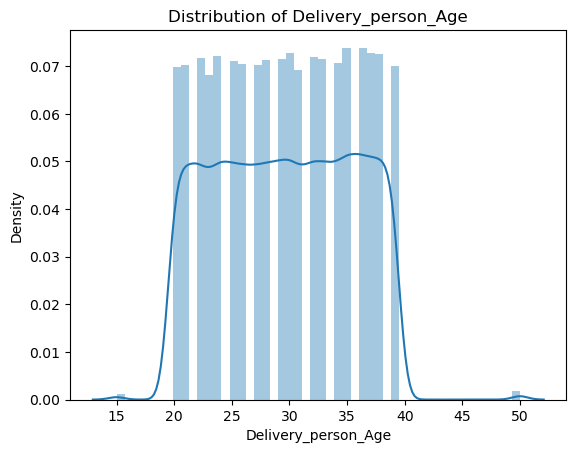

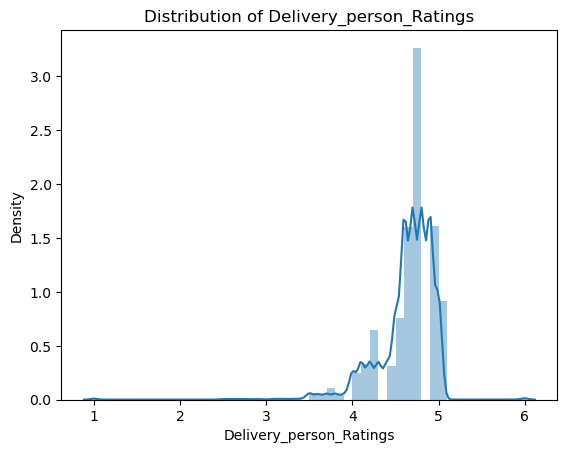

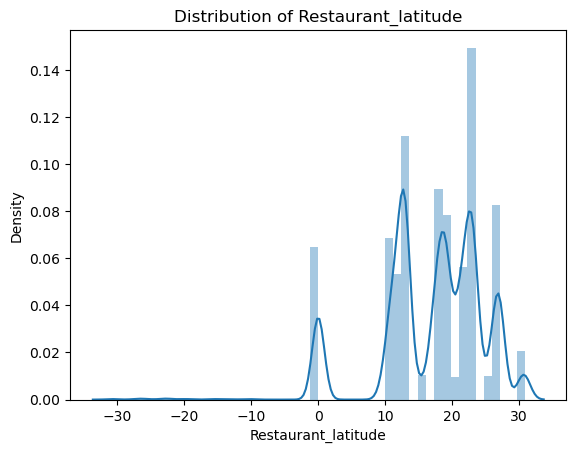

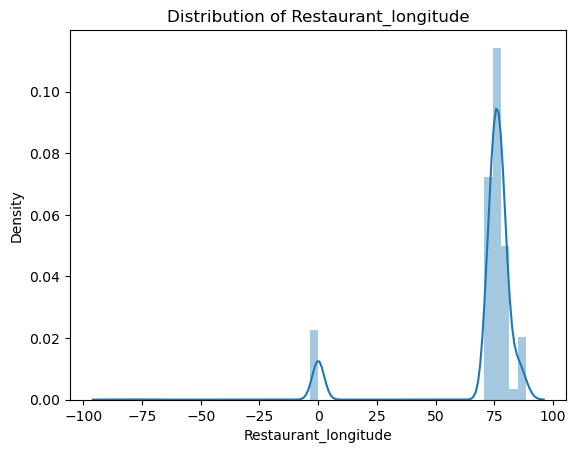

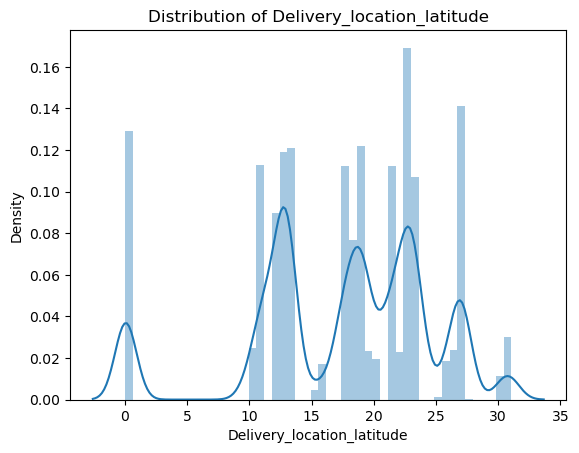

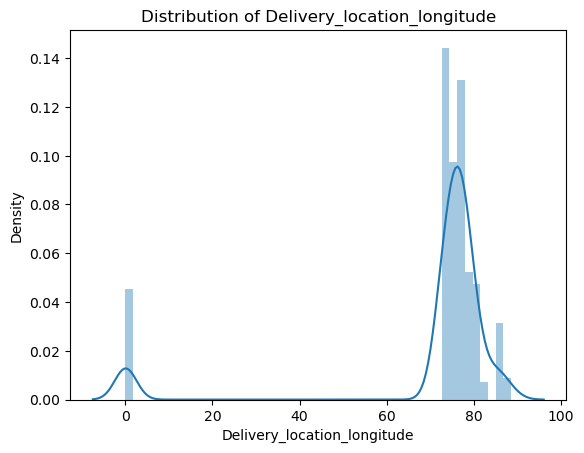

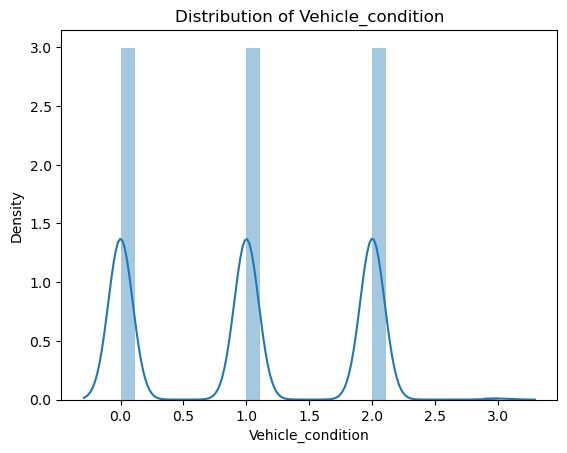

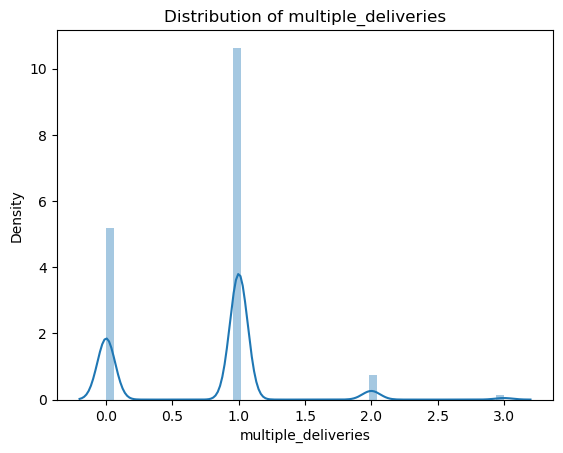

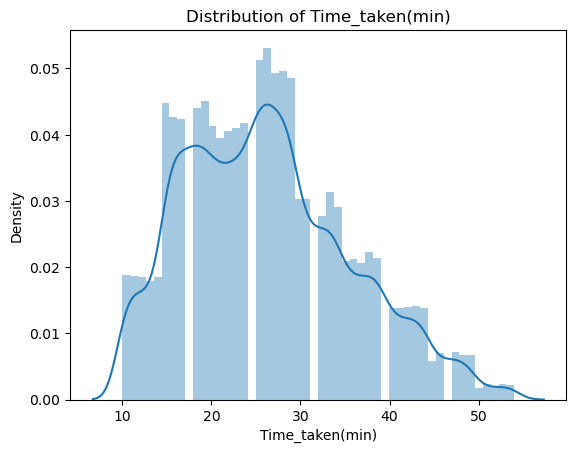

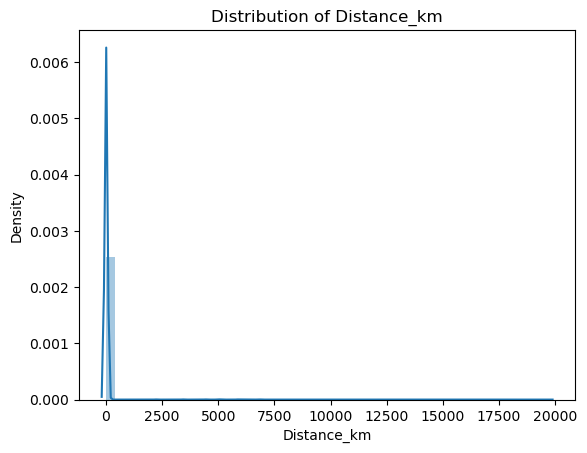

In [31]:
#Data Transformation
for column in train.columns:
  if train[column].dtype!='O':
    sns.distplot(train[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [32]:
#Applying square root transformation on the columns
train['Delivery_person_Ratings']=np.sqrt(train['Delivery_person_Ratings'])
train['Distance_km']=np.sqrt(train['Distance_km'])

In [33]:
# Clean Festival column before encoding
fake_nans = ["Nan ","nan", "null", "none", ""]
train['Festival'] = train['Festival'].astype(str).str.strip().str.lower()
train['Festival'] = train['Festival'].replace(fake_nans, "NaN")


# **Encoding**

In [34]:
import pickle
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']
for col in categorical_columns:
    train[col] = train[col].astype(str).str.strip()


#Creating a dictionary to store label encoders for each categorical column
label_encoders = {}

#Identifying and initializing label encoders for categorical columns
for column in train.columns:
    if train[column].dtype == 'O':#check if the column is of object datatype
        label_encoders[column] = LabelEncoder()
label_encoders


{'Time_Orderd': LabelEncoder(),
 'Time_Order_picked': LabelEncoder(),
 'Weatherconditions': LabelEncoder(),
 'Road_traffic_density': LabelEncoder(),
 'Type_of_order': LabelEncoder(),
 'Type_of_vehicle': LabelEncoder(),
 'Festival': LabelEncoder(),
 'City': LabelEncoder()}

In [35]:
# Applying label encoding to each categorical column
for column in train.columns:
    if train[column].dtype == 'O':
        # Special handling for time columns to include a full range of possible times
        if column in ['Time_Orderd', 'Time_Order_picked']:
            # Generate a list of all possible times in HH:MM:SS format with 5-minute intervals
            all_times = [f'{h:02d}:{m:02d}:00' for h in range(24) for m in range(0, 60, 5)]
            # Get unique time strings from the training data
            train_times = train[column].astype(str).unique().tolist()
            # Combine and get unique times
            combined_times = sorted(list(set(all_times + train_times)))
            # Fit the encoder on the combined set of times
            label_encoders[column].fit(combined_times)
            # Transform the training data
            train[column] = label_encoders[column].transform(train[column].astype(str))
        else:
            # Fit and transform other object type columns as before
            train[column] = label_encoders[column].fit_transform(train[column])

        filename=f"{column}.pkl"
        pickle.dump(label_encoders[column],open(filename,'wb'))

for col in ['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City', 'Time_Orderd', 'Time_Order_picked']:
    print(f"{col} encoder classes: {label_encoders[col].classes_}")

Weatherconditions encoder classes: ['Cloudy' 'Fog' 'Metropolitian' 'Sandstorms' 'Stormy' 'Sunny' 'Windy']
Road_traffic_density encoder classes: ['High' 'Jam' 'Low' 'Medium' 'NaN']
Type_of_order encoder classes: ['Buffet' 'Drinks' 'Meal' 'Snack']
Type_of_vehicle encoder classes: ['bicycle' 'electric_scooter' 'motorcycle' 'scooter']
Festival encoder classes: ['NaN' 'no' 'yes']
City encoder classes: ['Metropolitian' 'Semi-Urban' 'Urban']
Time_Orderd encoder classes: ['00:00:00' '00:05:00' '00:10:00' '00:15:00' '00:20:00' '00:25:00'
 '00:30:00' '00:35:00' '00:40:00' '00:45:00' '00:50:00' '00:55:00'
 '01:00:00' '01:05:00' '01:10:00' '01:15:00' '01:20:00' '01:25:00'
 '01:30:00' '01:35:00' '01:40:00' '01:45:00' '01:50:00' '01:55:00'
 '02:00:00' '02:05:00' '02:10:00' '02:15:00' '02:20:00' '02:25:00'
 '02:30:00' '02:35:00' '02:40:00' '02:45:00' '02:50:00' '02:55:00'
 '03:00:00' '03:05:00' '03:10:00' '03:15:00' '03:20:00' '03:25:00'
 '03:30:00' '03:35:00' '03:40:00' '03:45:00' '03:50:00' '03:55:

In [36]:
train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'Distance_km'],
      dtype='object')

# **Splitting the Dataset into X and y**

In [37]:
#Splitting the Dataset into X and y
X=train.drop('Time_taken(min)',axis=1)
y=train['Time_taken(min)']
y

0        24.0
1        33.0
2        26.0
3        21.0
4        30.0
         ... 
45588    32.0
45589    36.0
45590    16.0
45591    26.0
45592    36.0
Name: Time_taken(min), Length: 43739, dtype: float64

# **Scaling**

In [38]:
#Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled = ss.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)


In [39]:

filename="ss.pkl"
pickle.dump(ss,open(filename,'wb'))

# **Train test split**

In [40]:
#Performing Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Model Building**

### **Training the Model in Multiple Algorithms**

In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def Predictions(model):
  models=model.fit(X_train,y_train)
  y_pred_test=models.predict(X_test)
  y_pred_train=models.predict(X_train)
  print("R2Score for Training",r2_score(y_train,y_pred_train))
  print("R2Score for Testing",r2_score(y_test,y_pred_test))
  print("MSE for Training",mean_squared_error(y_train,y_pred_train))
  print("MSE for Testing",mean_squared_error(y_test,y_pred_test))
  print("MAE for Training",mean_absolute_error(y_train,y_pred_train))
  print("MAE for Testing",mean_absolute_error(y_test,y_pred_test))


#### **1. Decision Tree model**

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
Predictions(dt)

R2Score for Training 1.0
R2Score for Testing 0.6881338829136714
MSE for Training 0.0
MSE for Testing 26.978852309099224
MAE for Training 0.0
MAE for Testing 3.969935985368084


#### **2. Random Forest Model**

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
Predictions(rf)

R2Score for Training 0.9764509509205894
R2Score for Testing 0.8318656299276244
MSE for Training 2.0740950930239204
MSE for Testing 14.54493479652492
MAE for Training 1.1422377182704124
MAE for Testing 3.0568564243255603


#### **3. KNN Model**

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
Predictions(knn)

R2Score for Training 0.7417112671479298
R2Score for Testing 0.6038619128722564
MSE for Training 22.748918293275413
MSE for Testing 34.26903520804755
MAE for Training 3.7118973450315798
MAE for Testing 4.551760402377686


#### **4. XG Boost Model**

In [45]:
from xgboost import XGBRegressor
xg=XGBRegressor()
Predictions(xg)

R2Score for Training 0.8780441745787482
R2Score for Testing 0.8296850754288706
MSE for Training 10.741324552805722
MSE for Testing 14.73356977336511
MAE for Training 2.610034088378315
MAE for Testing 3.0740051392719634


# **Performance Testing and Hyperparameter Tuning**

### **1. Implementing RandomSearchCV For XGBoost**

In [46]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    'n_estimators':[100,200,300,400],
    'max_depth':[3,4,5,6],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'subsample':[0.7,0.8,0.9,1.0],
    'colsample_bytree':[0.7,0.8,0.9,1.0],
    'gamma':[0,0.1,0.2,0.3],
}

scoring='neg_mean_squared_error'
random_search=RandomizedSearchCV(estimator=xg,
                                 param_distributions=param_grid,
                                 scoring=scoring,
                                 n_iter=25,#Number of random samples to try
                                 verbose=2,#Controls the verbosity of the search process
                                 cv=5, #Number of cross-validation folds
                                 n_jobs=-1,#Use all available CPU cores for parallel processing
                                 random_state=42#Set a random seed for reproducability
                                 )



In [47]:
Predictions(random_search)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
R2Score for Training 0.8677069306267058
R2Score for Testing 0.8326489736797847
MSE for Training 11.651782842820833
MSE for Testing 14.477169450310853
MAE for Training 2.736382275445876
MAE for Testing 3.049571672639293


### **2. Implementing RandomSearchCV For Decision Tree**

In [48]:
param_dist={
    'criterion':['mse','friedman_mse','mae','poisson'],
    'splitter':['best','random'],
    'max_depth':[None]+list(np.arange(1,20)),
    'min_samples_split':list(np.arange(2,21)),
    'min_samples_leaf':list(np.arange(1,21)),
}

In [49]:
random_search=RandomizedSearchCV(estimator=dt,
                                 param_distributions=param_dist,
                                 n_iter=100,
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=2,
                                 scoring=scoring,
                                 random_state=42)
#Fit the RandomizedSearchCV to your data
Predictions(random_search)

#Get the best hyperparameters and the best model
best_params=random_search.best_params_
best_model=random_search.best_estimator_

#Print the best hyperparameters
print("Best Hyperparameters:",best_params)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
R2Score for Training 0.8431571283447777
R2Score for Testing 0.8293087097640085
MSE for Training 13.814019809415534
MSE for Testing 14.766128339782632
MAE for Training 2.9848518730780156
MAE for Testing 3.085086248990194
Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_depth': 10, 'criterion': 'poisson'}


### **3. Implementing RandomSearchCV For RandomForest**

In [50]:
# Create a new param_grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400,500],
    'max_depth': list(np.arange(5, 20)),
    'min_samples_split': list(np.arange(2, 15)),
    'min_samples_leaf': list(np.arange(1, 10)),
    'max_features': ['sqrt', 'log2', None],
}

In [51]:
random_search=RandomizedSearchCV(
    rf,
    param_distributions=param_grid_rf, # Changed from param_dist to param_grid_rf
    n_iter=10,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
#Fit the RandomizedSearchCV to your data
Predictions(random_search)

#Get the best hyperparameters and the best model
best_params=random_search.best_params_
best_model=random_search.best_estimator_

#Print the best hyperparameters
print("Best Hyperparameters:",best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2Score for Training 0.8655421222581136
R2Score for Testing 0.8404048409571276
MSE for Training 11.842449497745768
MSE for Testing 13.806226419502265
MAE for Training 2.782354537073393
MAE for Testing 3.0035412932759264
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 11}


# **Model Deployment**

# **Saving the best model via random search object**

In [52]:
import pickle
filename="rf.pkl"
pickle.dump(random_search,open(filename,"wb"))

# **Model Testing**

In [53]:
# If you accidentally created Festival_clean, rename it back to Festival
if 'Festival_clean' in X.columns:
    X = X.rename(columns={'Festival_clean': 'Festival'})

# Or if you have both, drop the clean version and keep the original
if 'Festival_clean' in X.columns and 'Festival' in X.columns:
    X = X.drop(columns=['Festival_clean'])


In [54]:
X = X.loc[:, ~X.columns.duplicated()]

expected_features = [
    'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude',
    'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
    'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
    'multiple_deliveries', 'Festival', 'City', 'Distance_km'
]
X = X[expected_features]



print(X.columns.tolist())
X.head()


['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Distance_km']


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance_km
0,1.278203,0.750601,0.712776,0.243602,0.722609,0.240659,-1.328003,-1.097127,0.877830,-1.842407,1.212383,1.333231,-0.424907,-1.319208,-0.093284,1.862310,-0.295002
1,0.762304,-0.356013,-0.553560,0.326991,-0.601399,0.330517,0.376718,0.411061,0.404479,-0.781673,1.212383,1.333231,1.256842,0.442112,-0.093284,-0.539659,0.227935
2,-1.129327,-0.640272,-0.553403,0.326766,-0.617574,0.324615,-1.947901,-1.656868,-0.068872,0.279061,-1.223913,-0.455274,-0.424907,0.442112,-0.093284,1.862310,-0.388676
3,1.450169,0.203182,-0.799482,0.294081,-0.872324,0.293324,0.015111,0.100095,0.877830,1.339795,-1.223913,-1.349526,-0.424907,0.442112,-0.093284,-0.539659,-0.095227
4,0.418371,-0.074896,-0.545865,0.446515,-0.605518,0.447605,-0.914737,-0.723967,-1.488925,-1.842407,-0.005765,1.333231,1.256842,0.442112,-0.093284,-0.539659,-0.152038


In [66]:
for idx in range(25):
    row = X.iloc[[idx]]
    pred = random_search.predict(row)[0]
    actual = y.iloc[idx]
    print(f"Row {idx}: Prediction={pred:.2f}, Actual={actual}")



Row 0: Prediction=19.08, Actual=24.0
Row 1: Prediction=33.80, Actual=33.0
Row 2: Prediction=22.24, Actual=26.0
Row 3: Prediction=23.79, Actual=21.0
Row 4: Prediction=30.22, Actual=30.0
Row 5: Prediction=24.88, Actual=26.0
Row 6: Prediction=41.66, Actual=40.0
Row 7: Prediction=36.08, Actual=32.0
Row 8: Prediction=30.54, Actual=34.0
Row 9: Prediction=45.58, Actual=46.0
Row 10: Prediction=21.08, Actual=23.0
Row 11: Prediction=22.54, Actual=21.0
Row 12: Prediction=24.25, Actual=20.0
Row 13: Prediction=36.04, Actual=41.0
Row 14: Prediction=22.24, Actual=20.0
Row 15: Prediction=32.54, Actual=33.0
Row 16: Prediction=36.48, Actual=40.0
Row 17: Prediction=45.62, Actual=41.0
Row 18: Prediction=25.50, Actual=15.0
Row 19: Prediction=36.94, Actual=36.0
Row 20: Prediction=22.15, Actual=26.0
Row 21: Prediction=24.61, Actual=20.0
Row 22: Prediction=36.62, Actual=39.0
Row 23: Prediction=32.45, Actual=34.0
Row 24: Prediction=15.19, Actual=15.0


# **Experimentation**

In [56]:
X['Festival'].unique()

array([-0.0932839 ,  6.32203794, -6.50860574])

In [57]:
print('Festival' in X.columns)



True


In [58]:
fake_nans = ["nan", "NaN","NaN " "NULL", "None", "", " "]
total_missing = X.isna().sum() + (X.isin(fake_nans)).sum()
print(total_missing)


Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Distance_km                    0
dtype: int64


In [59]:
X.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance_km
0,1.278203,0.750601,0.712776,0.243602,0.722609,0.240659,-1.328003,-1.097127,0.877830,-1.842407,1.212383,1.333231,-0.424907,-1.319208,-0.093284,1.862310,-0.295002
1,0.762304,-0.356013,-0.553560,0.326991,-0.601399,0.330517,0.376718,0.411061,0.404479,-0.781673,1.212383,1.333231,1.256842,0.442112,-0.093284,-0.539659,0.227935
2,-1.129327,-0.640272,-0.553403,0.326766,-0.617574,0.324615,-1.947901,-1.656868,-0.068872,0.279061,-1.223913,-0.455274,-0.424907,0.442112,-0.093284,1.862310,-0.388676
3,1.450169,0.203182,-0.799482,0.294081,-0.872324,0.293324,0.015111,0.100095,0.877830,1.339795,-1.223913,-1.349526,-0.424907,0.442112,-0.093284,-0.539659,-0.095227
4,0.418371,-0.074896,-0.545865,0.446515,-0.605518,0.447605,-0.914737,-0.723967,-1.488925,-1.842407,-0.005765,1.333231,1.256842,0.442112,-0.093284,-0.539659,-0.152038


In [60]:
# Assuming you have a dictionary of fitted LabelEncoders called label_encoders
for col, le in label_encoders.items():
    print(f"{col} encoder classes:")
    for cls in le.classes_:
        print(f"'{cls}'")
    print()


Time_Orderd encoder classes:
'00:00:00'
'00:05:00'
'00:10:00'
'00:15:00'
'00:20:00'
'00:25:00'
'00:30:00'
'00:35:00'
'00:40:00'
'00:45:00'
'00:50:00'
'00:55:00'
'01:00:00'
'01:05:00'
'01:10:00'
'01:15:00'
'01:20:00'
'01:25:00'
'01:30:00'
'01:35:00'
'01:40:00'
'01:45:00'
'01:50:00'
'01:55:00'
'02:00:00'
'02:05:00'
'02:10:00'
'02:15:00'
'02:20:00'
'02:25:00'
'02:30:00'
'02:35:00'
'02:40:00'
'02:45:00'
'02:50:00'
'02:55:00'
'03:00:00'
'03:05:00'
'03:10:00'
'03:15:00'
'03:20:00'
'03:25:00'
'03:30:00'
'03:35:00'
'03:40:00'
'03:45:00'
'03:50:00'
'03:55:00'
'04:00:00'
'04:05:00'
'04:10:00'
'04:15:00'
'04:20:00'
'04:25:00'
'04:30:00'
'04:35:00'
'04:40:00'
'04:45:00'
'04:50:00'
'04:55:00'
'05:00:00'
'05:05:00'
'05:10:00'
'05:15:00'
'05:20:00'
'05:25:00'
'05:30:00'
'05:35:00'
'05:40:00'
'05:45:00'
'05:50:00'
'05:55:00'
'06:00:00'
'06:05:00'
'06:10:00'
'06:15:00'
'06:20:00'
'06:25:00'
'06:30:00'
'06:35:00'
'06:40:00'
'06:45:00'
'06:50:00'
'06:55:00'
'07:00:00'
'07:05:00'
'07:10:00'
'07:15:00'
'07

In [61]:
# Check the actual values and types in your time columns
print("Time_Orderd values:")
print(train['Time_Orderd'].head(10))
print("Data type:", train['Time_Orderd'].dtype)
print("Any NaN values:", train['Time_Orderd'].isna().sum())

print("\nTime_Order_picked values:")
print(train['Time_Order_picked'].head(10))
print("Data type:", train['Time_Order_picked'].dtype)
print("Any NaN values:", train['Time_Order_picked'].isna().sum())

# Check the specific row you're testing
print(f"\nRow 0 Time_Orderd: '{train.iloc[0]['Time_Orderd']}' (type: {type(train.iloc[0]['Time_Orderd'])})")
print(f"Row 0 Time_Order_picked: '{train.iloc[0]['Time_Order_picked']}' (type: {type(train.iloc[0]['Time_Order_picked'])})")



Time_Orderd values:
0    138
1    237
2    102
3    216
4    162
5    256
6    231
7    209
8    251
9    263
Name: Time_Orderd, dtype: int32
Data type: int32
Any NaN values: 0

Time_Order_picked values:
0    141
1    238
2    105
3    218
4    165
5    258
6    234
7    210
8    253
9    266
Name: Time_Order_picked, dtype: int32
Data type: int32
Any NaN values: 0

Row 0 Time_Orderd: '138.0' (type: <class 'numpy.float64'>)
Row 0 Time_Order_picked: '141.0' (type: <class 'numpy.float64'>)


In [62]:
# Check if you have the original DataFrame before encoding
print("Current train.head() categorical values:")
print(X[['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']].head())

# Check data types
print("\nData types:")
print(train[['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']].dtypes)



Current train.head() categorical values:
   Weatherconditions  Road_traffic_density  Type_of_order  Type_of_vehicle  \
0           0.877830             -1.842407       1.333231        -0.424907   
1           0.404479             -0.781673       1.333231         1.256842   
2          -0.068872              0.279061      -0.455274        -0.424907   
3           0.877830              1.339795      -1.349526        -0.424907   
4          -1.488925             -1.842407       1.333231         1.256842   

   Festival      City  
0 -0.093284  1.862310  
1 -0.093284 -0.539659  
2 -0.093284  1.862310  
3 -0.093284 -0.539659  
4 -0.093284 -0.539659  

Data types:
Weatherconditions       int32
Road_traffic_density    int32
Type_of_order           int32
Type_of_vehicle         int32
Festival                int32
City                    int32
dtype: object


In [63]:
print(sorted(train['Time_Orderd'].unique()))
print(sorted(train['Time_Order_picked'].unique()))


[0, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287]
[0, 1, 2, 3, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 1

In [64]:
print(type(X['Time_Orderd'].iloc[0]))  # Should show <class 'datetime.time'>


<class 'numpy.float64'>


In [65]:
try:
    models_path = ""
    scaler = pickle.load(open(os.path.join(models_path, 'ss.pkl'), 'rb'))
    model = pickle.load(open(os.path.join(models_path, 'rf.pkl'), 'rb'))
    print("Loaded scaler and model from parent/models directory")
except FileNotFoundError:
    print("Pickle files not found in parent/models directory")
row_idx = 0  # or whichever row you want to compare
features_notebook = X.iloc[row_idx].values
print("Notebook - Encoded features for row", row_idx, ":", features_notebook)
print("Notebook - Feature types:", [type(x) for x in features_notebook])
scaled_features_notebook = scaler.transform([features_notebook])
print("Notebook - Scaled features for row", row_idx, ":", scaled_features_notebook[0])
print("Notebook - Prediction for row", row_idx, ":", model.predict(scaled_features_notebook)[0])



Pickle files not found in parent/models directory
Notebook - Encoded features for row 0 : [ 1.27820284  0.75060132  0.71277587  0.24360201  0.72260857  0.24065863
 -1.3280026  -1.0971274   0.87782979 -1.84240658  1.21238282  1.33323126
 -0.42490701 -1.31920751 -0.0932839   1.86230986 -0.29500247]
Notebook - Feature types: [<class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>]


NameError: name 'scaler' is not defined

In [ ]:
# If you have a separate y (target) array
print("Actual values for first 5 rows:", y[:5])


Actual values for first 5 rows: 0    24.0
1    33.0
2    26.0
3    21.0
4    30.0
Name: Time_taken(min), dtype: float64


In [ ]:
# Get the features for the first 5 rows
features_first5 = X.iloc[:5].values

# Scale them if needed
scaled_features_first5 = scaler.transform(features_first5)

# Get predictions
predictions_first5 = model.predict(scaled_features_first5)
print("Predicted values for first 5 rows:", predictions_first5)


Predicted values for first 5 rows: [25.99071729 26.11327555 24.77271589 24.89446113 24.89363278]


In [ ]:
import os
import pickle

try:
    models_path = ""
    model = pickle.load(open(os.path.join(models_path, 'rf.pkl'), 'rb'))
    print("Loaded model from pickle")
except FileNotFoundError:
    print("Using model from current session")
    model = random_search  # Use your trained model from the current session

row_idx = 4
features_notebook = X.iloc[row_idx].values  # Already scaled and encoded
print("Notebook - Features for row", row_idx, ":", features_notebook)

# Don't scale again - X is already processed
prediction = model.predict([features_notebook])[0]
print("Notebook - Prediction for row", row_idx, ":", prediction)



Loaded model from pickle
Notebook - Features for row 4 : [ 0.41837075 -0.07489582 -0.54586455  0.44651515 -0.60551801  0.4476047
 -0.91473693 -0.72396729 -1.48892547 -1.84240658 -0.00576503  1.33323126
  1.25684195  0.4421117  -0.0932839  -0.53965909 -0.15203821]
Notebook - Prediction for row 4 : 30.142560037897212


In [ ]:
X.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Distance_km'],
      dtype='object')